# Capstone Project 

# Title 
- Movies Recommendation System

# Dataset Used 
- Rating.csv
- Movies.csv

# Group Member 

- Muhammad Kareem Khan

- Rishab Jain

- Chayan Dwivedi

- Deepshri Deepak Kondra

- KADAKUZHILL JOB HIMALAYA

- Sai Kumar


# Importing Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
rat = pd.read_csv('ratings.csv')
rat.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
mov = pd.read_csv('movies.csv')
mov.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Shape of dataset

In [4]:
print("Shape of ratings.csv",rat.shape)
print('number of rows in rating.csv: ',rat.shape[0])
print('number of columns in rating.csv: ',rat.shape[1])
print("----------------------------------------")
print("Shape of movies.csv",mov.shape)
print('number of rows in movies.csv: ',mov.shape[0])
print('number of columns in rating.csv: ',mov.shape[1])

Shape of ratings.csv (100836, 4)
number of rows in rating.csv:  100836
number of columns in rating.csv:  4
----------------------------------------
Shape of movies.csv (9742, 3)
number of rows in movies.csv:  9742
number of columns in rating.csv:  3


# Info

In [5]:
rat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


ratings dataset has all muneric columns

In [6]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


movies dataset has one numeric and two abject type columns

# length of datasets 

In [7]:
len(rat['movieId'].unique()) 

9724

we have 9724 movie deatils in rat i.e ratings  dataset

In [8]:
len(mov['movieId'].unique())

9742

we have 9724 movie deatils in mov i.e movie datails  dataset

From above observation we can  see moviesID in rating datadset and movieID in movies dataset are same so we can merge both the datset to get a single datset with combinations of ratings given by the user to movie and movied details.

# Cleaning and Preprocessing 

In [9]:
mov['title']

0                                Toy Story (1995)
1                                  Jumanji (1995)
2                         Grumpier Old Men (1995)
3                        Waiting to Exhale (1995)
4              Father of the Bride Part II (1995)
                          ...                    
9737    Black Butler: Book of the Atlantic (2017)
9738                 No Game No Life: Zero (2017)
9739                                 Flint (2017)
9740          Bungo Stray Dogs: Dead Apple (2018)
9741          Andrew Dice Clay: Dice Rules (1991)
Name: title, Length: 9742, dtype: object

as we can see column title has movie name and the release year in ().
extracting the relese year 

extract release year into a separate column

In [10]:
import re

mov['release_year'] = mov['title'].str.extract(r'\((\d{4})\)$')


In [11]:
mov.tail()

,movieId,title,genres,release_year
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,1991


Missing Values :-

In [12]:
mov.isnull().sum()

movieId          0
title            0
genres           0
release_year    24
dtype: int64

In [13]:
rat.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Treatment for genres columns in movie dataset

In [14]:
mov['genres'] = mov['genres'].str.replace('|',' ')
mov['genres']

0       Adventure Animation Children Comedy Fantasy
1                        Adventure Children Fantasy
2                                    Comedy Romance
3                              Comedy Drama Romance
4                                            Comedy
                           ...                     
9737                Action Animation Comedy Fantasy
9738                       Animation Comedy Fantasy
9739                                          Drama
9740                               Action Animation
9741                                         Comedy
Name: genres, Length: 9742, dtype: object

Merging both the datsets 'rat' and 'mov' to create a single dataframe 'df' for easy analysis.

In [15]:
df = pd.merge(rat,mov, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres,release_year
0,1,1,4.0,964982703,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1995
1,5,1,4.0,847434962,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1995
2,7,1,4.5,1106635946,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1995
3,15,1,2.5,1510577970,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1995
4,17,1,4.5,1305696483,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1995


checking for null values

In [16]:
df.isnull().sum()

userId           0
movieId          0
rating           0
timestamp        0
title            0
genres           0
release_year    31
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   userId        100836 non-null  int64  
 1   movieId       100836 non-null  int64  
 2   rating        100836 non-null  float64
 3   timestamp     100836 non-null  int64  
 4   title         100836 non-null  object 
 5   genres        100836 non-null  object 
 6   release_year  100805 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 6.2+ MB


above in df we can see each movie is a combination of different types of genres
we are extracting the information about the genres to which the movie belongs
first we are seeing how many unique genres are available in the whole dataframe

In [18]:
df['genres'].apply(lambda x : x.split(' '))


a = df['genres'].unique()
c = []
for i in a:
    c.append(i.split(' '))
    
    
d = []
for i in c:
    for j in i:
        d.append(j)

In [19]:
d = set(d)
print(d)  

{'genres', 'Horror', '(no', 'Crime', 'Adventure', 'Fantasy', 'Comedy', 'Documentary', 'Romance', 'Drama', 'Action', 'Film-Noir', 'Children', 'Mystery', 'Musical', 'Sci-Fi', 'Animation', 'War', 'listed)', 'Western', 'Thriller', 'IMAX'}


this shows how many types of unique genres are there in the dataframe

In [20]:
# cleaning genres column in final datframe

In [21]:
df['genres']=df['genres'].apply(lambda x: x.split(' '))
df.head()

,userId,movieId,rating,timestamp,title,genres,release_year
0,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,5,1,4.0,847434962,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
2,7,1,4.5,1106635946,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
3,15,1,2.5,1510577970,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
4,17,1,4.5,1305696483,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995


as above we saw there were diferent types of genres. creating dummies of those genres. if present in that row gives 1 else 0

In [22]:
dummies = pd.get_dummies(df['genres'].apply(pd.Series).stack()).sum(level=0)

# Rename the columns to match the unique elements in the 'genre' column
dummies.columns = ['genre_' + col for col in dummies.columns]
print(dummies.columns)

Index(['genre_(no', 'genre_Action', 'genre_Adventure', 'genre_Animation',
       'genre_Children', 'genre_Comedy', 'genre_Crime', 'genre_Documentary',
       'genre_Drama', 'genre_Fantasy', 'genre_Film-Noir', 'genre_Horror',
       'genre_IMAX', 'genre_Musical', 'genre_Mystery', 'genre_Romance',
       'genre_Sci-Fi', 'genre_Thriller', 'genre_War', 'genre_Western',
       'genre_genres', 'genre_listed)'],
      dtype='object')


In [23]:
dummies.shape

(100836, 22)

In [24]:
#combining the both datasets 
df = pd.concat([df,dummies],axis=1)
df.head(2)

,userId,movieId,rating,timestamp,title,genres,release_year,genre_(no,genre_Action,genre_Adventure,...,genre_IMAX,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western,genre_genres,genre_listed)
0,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,847434962,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# creating a new csv file of the final dataset
df.to_csv('final_dataset.csv')

#loading the final datset and doing further analysis and modifications and required changes
data = pd.read_csv('final_dataset.csv')
data.head(2)

,Unnamed: 0,userId,movieId,rating,timestamp,title,genres,release_year,genre_(no,genre_Action,...,genre_IMAX,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western,genre_genres,genre_listed)
0,0,1,1,4.0,964982703,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy...",1995.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,5,1,4.0,847434962,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy...",1995.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
data.shape

(100836, 30)

In [27]:
df = data.drop(['Unnamed: 0'],axis=1)
df.head(2)

,userId,movieId,rating,timestamp,title,genres,release_year,genre_(no,genre_Action,genre_Adventure,...,genre_IMAX,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western,genre_genres,genre_listed)
0,1,1,4.0,964982703,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy...",1995.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,847434962,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy...",1995.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   userId             100836 non-null  int64  
 1   movieId            100836 non-null  int64  
 2   rating             100836 non-null  float64
 3   timestamp          100836 non-null  int64  
 4   title              100836 non-null  object 
 5   genres             100836 non-null  object 
 6   release_year       100805 non-null  float64
 7   genre_(no          100836 non-null  int64  
 8   genre_Action       100836 non-null  int64  
 9   genre_Adventure    100836 non-null  int64  
 10  genre_Animation    100836 non-null  int64  
 11  genre_Children     100836 non-null  int64  
 12  genre_Comedy       100836 non-null  int64  
 13  genre_Crime        100836 non-null  int64  
 14  genre_Documentary  100836 non-null  int64  
 15  genre_Drama        100836 non-null  int64  
 16  ge

In [29]:
# the columns we are droping now are same as 'genre_(no'. so we are keeping this on column and droping the other columns same 
# as it and furthur renaming the column in below cell
df.drop(['genre_genres','genre_listed)'],axis=1,inplace=True)


df.rename(columns={'genre_(no':'genre_not_listed'},inplace=True)

df.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres',
       'release_year', 'genre_not_listed', 'genre_Action', 'genre_Adventure',
       'genre_Animation', 'genre_Children', 'genre_Comedy', 'genre_Crime',
       'genre_Documentary', 'genre_Drama', 'genre_Fantasy', 'genre_Film-Noir',
       'genre_Horror', 'genre_IMAX', 'genre_Musical', 'genre_Mystery',
       'genre_Romance', 'genre_Sci-Fi', 'genre_Thriller', 'genre_War',
       'genre_Western'],
      dtype='object')

In [30]:
# checking for  null values
df.isnull().sum()

userId                0
movieId               0
rating                0
timestamp             0
title                 0
genres                0
release_year         31
genre_not_listed      0
genre_Action          0
genre_Adventure       0
genre_Animation       0
genre_Children        0
genre_Comedy          0
genre_Crime           0
genre_Documentary     0
genre_Drama           0
genre_Fantasy         0
genre_Film-Noir       0
genre_Horror          0
genre_IMAX            0
genre_Musical         0
genre_Mystery         0
genre_Romance         0
genre_Sci-Fi          0
genre_Thriller        0
genre_War             0
genre_Western         0
dtype: int64

In [31]:
# 5 piont summary
df.describe()

,userId,movieId,rating,timestamp,release_year,genre_not_listed,genre_Action,genre_Adventure,genre_Animation,genre_Children,...,genre_Film-Noir,genre_Horror,genre_IMAX,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western
count,100836.000000,100836.000000,100836.000000,1.008360e+05,100805.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,...,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557,1.205946e+09,1994.443708,0.000466,0.303810,0.239607,0.069301,0.091317,...,0.008628,0.072306,0.041106,0.041037,0.076104,0.179737,0.171000,0.262327,0.048187,0.019140
std,182.618491,35530.987199,1.042529,2.162610e+08,14.361383,0.021585,0.459904,0.426846,0.253966,0.288060,...,0.092485,0.258994,0.198537,0.198377,0.265165,0.383970,0.376511,0.439902,0.214163,0.137018
min,1.000000,1.000000,0.500000,8.281246e+08,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,177.000000,1199.000000,3.000000,1.019124e+09,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,325.000000,2991.000000,3.500000,1.186087e+09,1997.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,477.000000,8122.000000,4.000000,1.435994e+09,2003.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,610.000000,193609.000000,5.000000,1.537799e+09,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# univariate and bivarate analysis

In [32]:
num = df.select_dtypes(include=np.number)
num.head(2)

,userId,movieId,rating,timestamp,release_year,genre_not_listed,genre_Action,genre_Adventure,genre_Animation,genre_Children,...,genre_Film-Noir,genre_Horror,genre_IMAX,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western
0,1,1,4.0,964982703,1995.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,847434962,1995.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
print("Numrical columns:")
print(num.columns)

print('---'*30)

print('Number of numeric columns:')
print(len(num.columns))

Numrical columns:
Index(['userId', 'movieId', 'rating', 'timestamp', 'release_year',
       'genre_not_listed', 'genre_Action', 'genre_Adventure',
       'genre_Animation', 'genre_Children', 'genre_Comedy', 'genre_Crime',
       'genre_Documentary', 'genre_Drama', 'genre_Fantasy', 'genre_Film-Noir',
       'genre_Horror', 'genre_IMAX', 'genre_Musical', 'genre_Mystery',
       'genre_Romance', 'genre_Sci-Fi', 'genre_Thriller', 'genre_War',
       'genre_Western'],
      dtype='object')
------------------------------------------------------------------------------------------
Number of numeric columns:
25


In [34]:
num['userId'].value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
431      20
194      20
257      20
207      20
189      20
Name: userId, Length: 610, dtype: int64

As we can see we have 610 users 

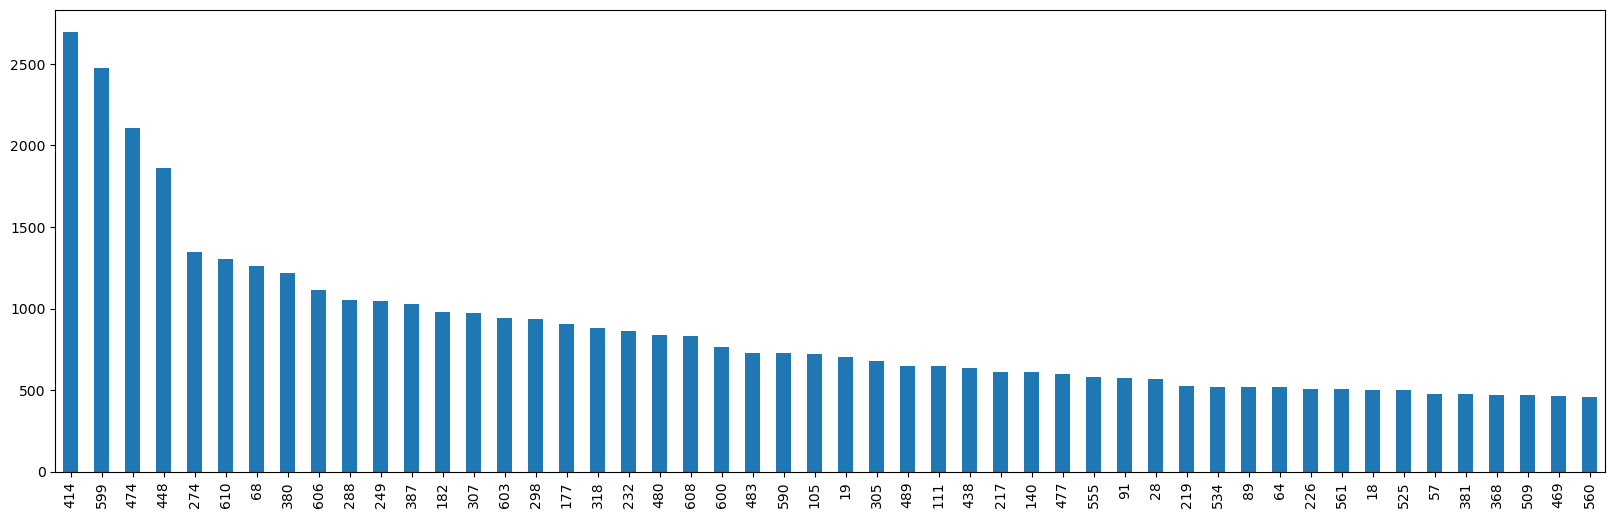

In [35]:
# as we have 610 users. we are looking the most occured users
plt.figure(figsize=(20,6))
num['userId'].value_counts()[:50].plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

UserId 414 is the most occured userId in the dataset or we can say that this user watched maximum number of movies .

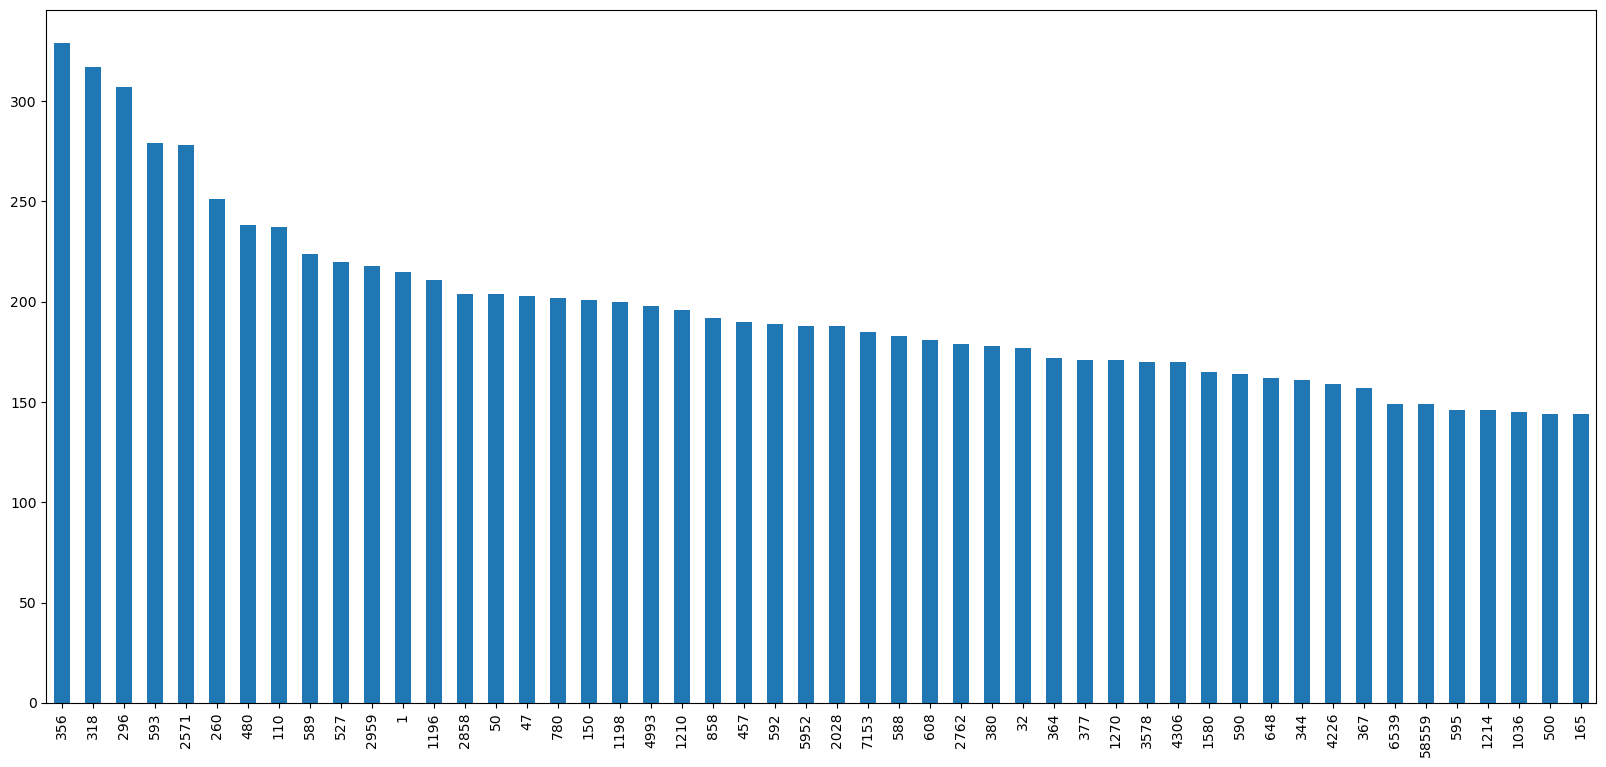

In [36]:
# same for movieid column as there are above 9000 we are seeing the top 50 most occured
plt.figure(figsize=(20,9))
num['movieId'].value_counts()[:50].plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

We can see that 356 movieId is the most watched moive in the dataset.

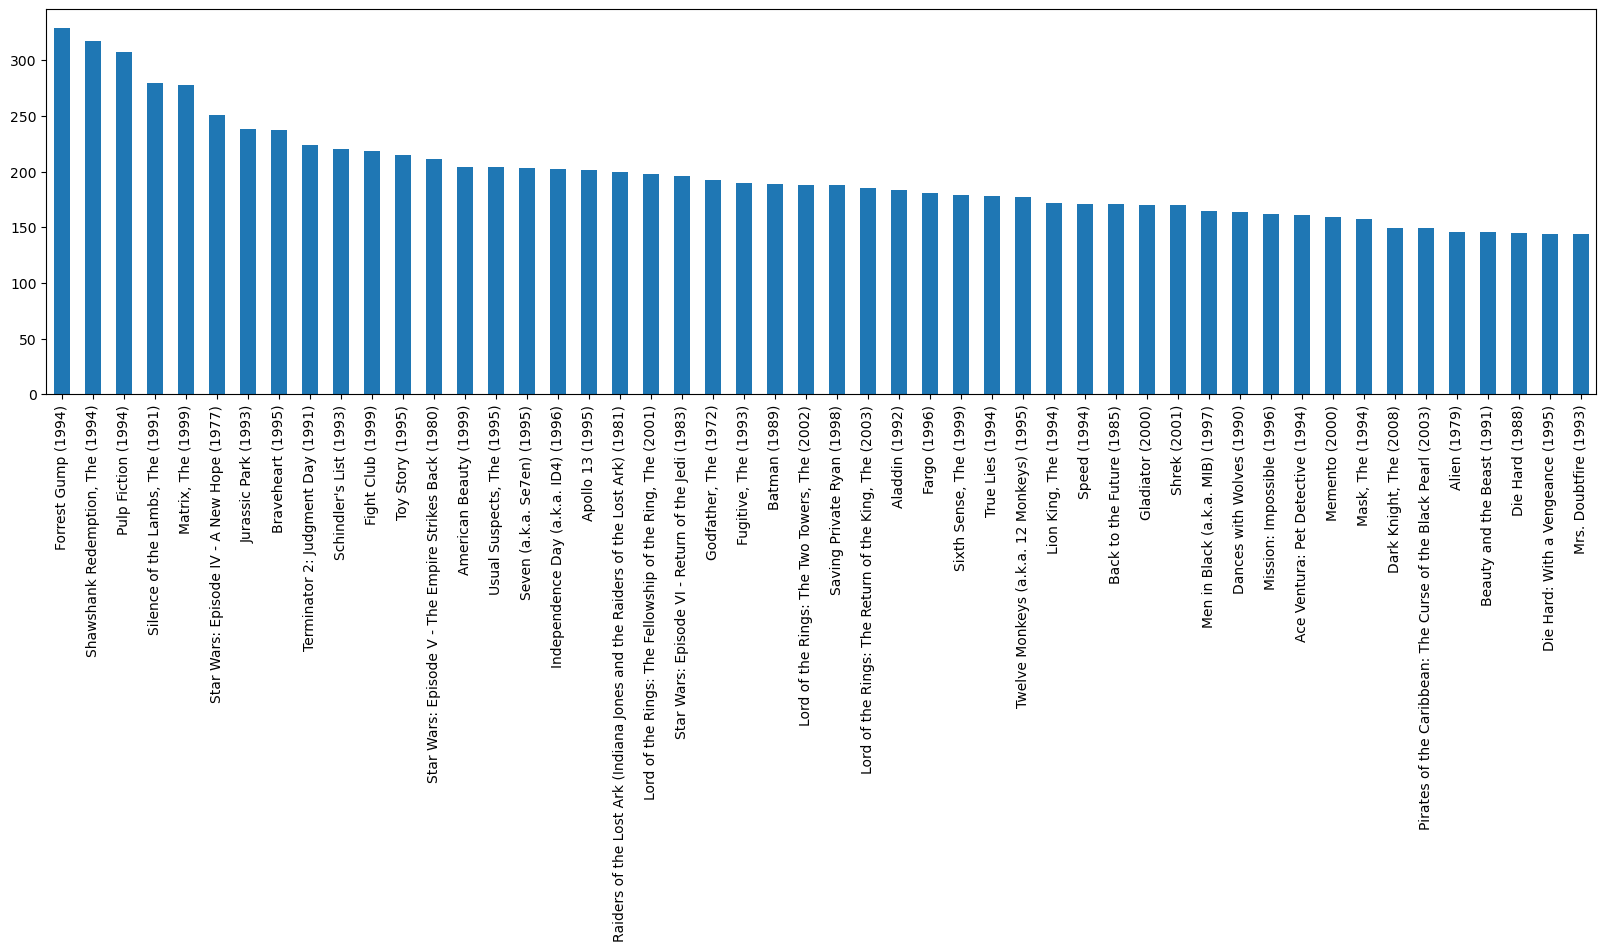

In [37]:
# viewing the top 50 movie mostly occured in the data 
plt.figure(figsize=(20,5))
df['title'].value_counts()[:50].plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

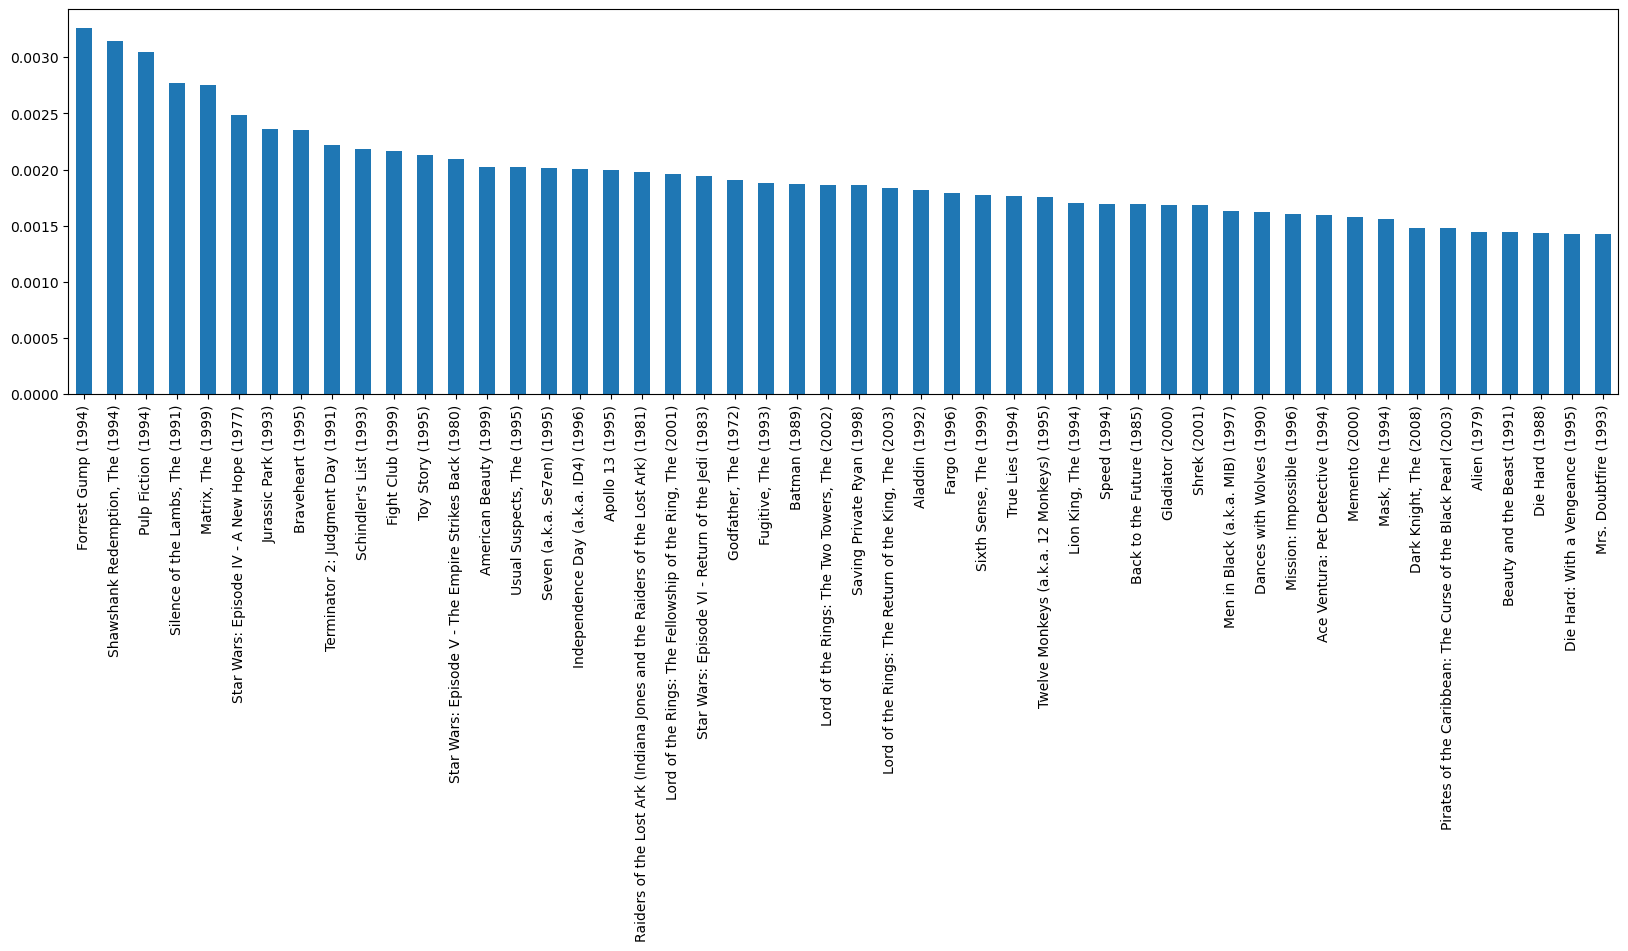

In [38]:
# viewing the top 50 movie mostly occured in the data in percentage
plt.figure(figsize=(20,5))
df['title'].value_counts(normalize=True)[:50].plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

As we can see that forest Gump is the most watched moive in the dataset 

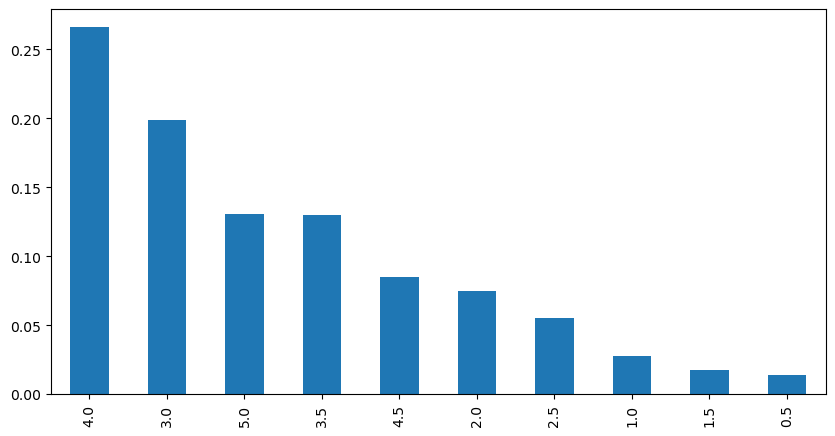

In [39]:
# viewing the rating given by the users  in percentage
plt.figure(figsize=(10,5))
df['rating'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

As we can see 4.0 is the most given rating to by the users.

In [40]:
tit = df['title'].value_counts().index
tit

Index(['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Jurassic Park (1993)', 'Braveheart (1995)',
       'Terminator 2: Judgment Day (1991)', 'Schindler's List (1993)',
       ...
       'Love (2015)', 'The Lost Room (2006)', 'Tangerine (2015)',
       'Chasuke's Journey (2015)', 'How To Change The World (2015)',
       'Sex, Drugs & Taxation (2013)', 'Extraordinary Tales (2015)',
       'Tomorrow (2015)', 'Embrace of the Serpent (2016)', '31 (2016)'],
      dtype='object', length=9719)

In [41]:
name= []
raatt = []
for i in tit:
    #print(i,'\n',round(df[df['title']==i]['rating'].mean()))
    name.append(i)
    raatt.append(round(df[df['title']==i]['rating'].mean()))
    
    
# geting the average rating given by the user to different movies
title_rat_mean = round(df.groupby(['title'])[['rating']].mean())


title_rat_mean = title_rat_mean.reset_index()

title_rat_mean = title_rat_mean.sort_values('rating',ascending=False)


print('max average rating: ',title_rat_mean['rating'].max())
print('minimum average rating: ',title_rat_mean['rating'].min())


title_rat_mean
    

max average rating:  5.0
minimum average rating:  0.0


,title,rating
9570,Wonder Woman (2009),5.0
2318,Delirium (2014),5.0
8113,Strictly Sexual (2008),5.0
8485,The Girl with All the Gifts (2016),5.0
250,Advise and Consent (1962),5.0
...,...,...
768,Bad Santa 2 (2016),0.0
5105,Lionheart (1990),0.0
611,Arthur Christmas (2011),0.0
4339,Indestructible Man (1956),0.0


In [42]:
# viewing tite whose average rating is above 3

title_rat_mean[title_rat_mean['rating']>3]


,title,rating
9570,Wonder Woman (2009),5.0
2318,Delirium (2014),5.0
8113,Strictly Sexual (2008),5.0
8485,The Girl with All the Gifts (2016),5.0
250,Advise and Consent (1962),5.0
...,...,...
8534,The Lobster (2015),4.0
1873,Coffy (1973),4.0
8538,The Lord's Lantern in Budapest (1999),4.0
2604,Drunken Master (Jui kuen) (1978),4.0


In [43]:
# movie title whose average rating is highest which is 5

title_rat_mean[title_rat_mean['rating']==5]


,title,rating
9570,Wonder Woman (2009),5.0
2318,Delirium (2014),5.0
8113,Strictly Sexual (2008),5.0
8485,The Girl with All the Gifts (2016),5.0
250,Advise and Consent (1962),5.0
...,...,...
4872,Lady Jane (1986),5.0
8731,Three from Prostokvashino (1978),5.0
9176,Victory (a.k.a. Escape to Victory) (1981),5.0
752,Bad Boy Bubby (1993),5.0


In [44]:
# we are taking few genres and looking the rating given to those genres

col = num.iloc[:,5:]
col

,genre_not_listed,genre_Action,genre_Adventure,genre_Animation,genre_Children,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Fantasy,genre_Film-Noir,genre_Horror,genre_IMAX,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
100832,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
100833,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
100834,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
col = num.iloc[:,5:]
fig,ax = plt.subplots(5,4,figsize=(25,25))
for i ,subplot in zip(col.columns,ax.flatten()):
    sns.countplot(num['rating'],hue=col[i],ax=subplot)

Treatment for null values in year column

In [45]:
# as we found some null values in release year. anlysing the reason for null values

df['release_year'].unique()

array([1995., 1996., 1994., 1977., 1993., 1990., 1989., 1991., 1940.,
       1939., 1941., 1938., 1947., 1975., 1968., 1945., 1963., 1971.,
       1951., 1979., 1992., 1986., 1982., 1980., 1987., 1981., 1983.,
       1960., 1952., 1984., 1933., 1985., 1974., 1922., 1997., 1998.,
       1930., 1976., 1942., 1967., 1959., 1946., 1978., 1973., 1988.,
       1999., 1931., 1964., 1962., 1965., 1969., 2000., 1970., 2003.,
       2004., 2006., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
       2015., 1955., 2002., 1961., 1954., 1957., 1943., 1956., 1966.,
       2001., 1937., 1972., 2005., 1950., 2007., 2016., 1926., 1944.,
       1949., 1936., 2017., 1958., 1935., 1927., 1953., 2018., 1923.,
       1902., 1920., 1948., 1928.,   nan, 1934., 1916., 1908., 1932.,
       1921., 1925., 1929., 1917., 1915., 1924., 1903., 1919.])

In [46]:
null_mask = df['release_year'].isnull()
null_movies = df[null_mask][['title','release_year']]
print(null_movies)

                                                    title  release_year
81507                                        Black Mirror           NaN
86726                               Runaway Brain (1995)            NaN
88645   The Adventures of Sherlock Holmes and Doctor W...           NaN
88668                   Death Note: Desu nôto (2006–2007)           NaN
89491                             Maria Bamford: Old Baby           NaN
89494                                   Generation Iron 2           NaN
93457                                    Ready Player One           NaN
93458                                    Ready Player One           NaN
93459                                    Ready Player One           NaN
93460                                    Ready Player One           NaN
93476                                           Babylon 5           NaN
93477                                           Babylon 5           NaN
96413                                   Nocturnal Animals       

 as above we can see some mivies have no release year
some movies have relase year but the code above we worte had not captured

In [47]:
df[df['title']=='Assembly (Ji jie hao) (2007) ']

,userId,movieId,rating,timestamp,title,genres,release_year,genre_not_listed,genre_Action,genre_Adventure,...,genre_Film-Noir,genre_Horror,genre_IMAX,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western
97123,339,58842,4.5,1494291470,Assembly (Ji jie hao) (2007),"['Action', 'Drama', 'War']",NaN,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
# above we can see that the title has year in it but the relese year is showing Nan

In [49]:
df[df['title']=='Black Mirror']

,userId,movieId,rating,timestamp,title,genres,release_year,genre_not_listed,genre_Action,genre_Adventure,...,genre_Film-Noir,genre_Horror,genre_IMAX,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western
81507,62,176601,5.0,1525795252,Black Mirror,"['(no', 'genres', 'listed)']",NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
import re
# Extract release year from title column
df['release_yearr'] = df['title'].str.extract(r'\((\d{4})\)', expand=False)

# Convert release year column to integer data type
df['release_yearr'] = pd.to_numeric(df['release_year'], errors='coerce')


null_mask = df['release_yearr'].isnull()
null_movies = df[null_mask][['title','release_yearr']]
print(null_movies)

                                                    title  release_yearr
81507                                        Black Mirror            NaN
86726                               Runaway Brain (1995)             NaN
88645   The Adventures of Sherlock Holmes and Doctor W...            NaN
88668                   Death Note: Desu nôto (2006–2007)            NaN
89491                             Maria Bamford: Old Baby            NaN
89494                                   Generation Iron 2            NaN
93457                                    Ready Player One            NaN
93458                                    Ready Player One            NaN
93459                                    Ready Player One            NaN
93460                                    Ready Player One            NaN
93476                                           Babylon 5            NaN
93477                                           Babylon 5            NaN
96413                                   Nocturnal A

the above treatment is not working  below doing an another aproach

In [51]:
# extracting the year in the below title
title = "3 dev adam (Three Giant Men) (1973)"
year_pattern = re.compile(r'\((\d{4})\)')
match = year_pattern.search(title)
if match:
    release_year = match.group(1)
else:
    release_year = None
print(release_year)

1973


applying the above treatment on whole datset

In [52]:
for index, row in df.iterrows():
    # Extract release year using regular expressions
    year = re.findall(r'\(\d{4}\)', row['title'])
    # If release year is found, store it in the release_year column
    if year:
        df.at[index, 'release_year'] = year[0][1:-1]  # Extract the year without parentheses
    else:
        df.at[index, 'release_year'] = np.nan

In [53]:
null_mask = df['release_year'].isnull()
null_movies = df[null_mask][['title','release_year']]
print(null_movies)

                                                   title release_year
81507                                       Black Mirror          NaN
88645  The Adventures of Sherlock Holmes and Doctor W...          NaN
88668                  Death Note: Desu nôto (2006–2007)          NaN
89491                            Maria Bamford: Old Baby          NaN
89494                                  Generation Iron 2          NaN
93457                                   Ready Player One          NaN
93458                                   Ready Player One          NaN
93459                                   Ready Player One          NaN
93460                                   Ready Player One          NaN
93476                                          Babylon 5          NaN
93477                                          Babylon 5          NaN
96413                                  Nocturnal Animals          NaN
96993                                             Cosmos          NaN
96994               

this method has worked. as we can se from above that the movies with no release year has only given nan 

In [54]:
df.isnull().sum()

userId                0
movieId               0
rating                0
timestamp             0
title                 0
genres                0
release_year         18
genre_not_listed      0
genre_Action          0
genre_Adventure       0
genre_Animation       0
genre_Children        0
genre_Comedy          0
genre_Crime           0
genre_Documentary     0
genre_Drama           0
genre_Fantasy         0
genre_Film-Noir       0
genre_Horror          0
genre_IMAX            0
genre_Musical         0
genre_Mystery         0
genre_Romance         0
genre_Sci-Fi          0
genre_Thriller        0
genre_War             0
genre_Western         0
release_yearr        31
dtype: int64

In [55]:
len(num.columns)

25

# Building the base model
## item-based-colaberative-recommender-system 

In [56]:
from sklearn.neighbors import KNeighborsClassifier,NearestNeighbors

final = round(df.groupby(['userId','movieId'])[['rating']].mean())

final = final.reset_index()

final

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [57]:
final.movieId.value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: movieId, Length: 9724, dtype: int64

In [58]:
final.userId.value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: userId, Length: 610, dtype: int64

In [59]:
rating_count = pd.DataFrame(final.groupby(['rating']).size(),columns=['count'])
rating_count

,count
rating,
0.0,1370
1.0,2811
2.0,14892
3.0,20047
4.0,48505
5.0,13211


In [60]:
movie_count = pd.DataFrame(final.groupby(['movieId']).size(),columns=['count'])
movie_count

,count
movieId,
1,215
2,110
3,52
4,7
5,49
...,...
193581,1
193583,1
193585,1


### Movie Recommendation using KNN with Input as User id, Number of similar users should the model pick and Number of movies you want to get recommended:

#### Movie Recommendation using KNN with Input as User id, Number of similar users should the model pick and Number of movies you want to get recommended:
#### Reshaping model in such a way that each user has n-dimensional rating space where n is total number of movies
#### We will train the KNN model inorder to find the closely matching similar users to the user we give as input and we recommend the top movies which would interest the input user.

In [61]:
piv=final.pivot(
    index='userId',
     columns='movieId',
      values='rating').fillna(0)


piv.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
# transform matrix to scipy sparse matrix
from scipy.sparse import csr_matrix
user_to_movie_sparse_df = csr_matrix(piv.values)
user_to_movie_sparse_df 

<610x9724 sparse matrix of type '<class 'numpy.float64'>'
	with 99466 stored elements in Compressed Sparse Row format>

In [63]:
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_to_movie_sparse_df)

NearestNeighbors(algorithm='brute', metric='cosine')

In [64]:
# function to find top n similar users of the given input user 

def get_similar_users(user, n = 5):
  ## input to this function is the user and number of top similar users you want.

    knn_input = np.asarray([piv.values[user-1]])  #.reshape(1,-1)
    
    # knn_input = user_to_movie_df.iloc[0,:].values.reshape(1,-1)
    
    distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n+1)

    print("Top",n,"users who are very much similar to the User-",user, "are: ")
    print(" ")
    for i in range(1,len(distances[0])):
        print(i,". User:", indices[0][i]+1, "separated by distance of",distances[0][i])
    return indices.flatten()[1:] + 1, distances.flatten()[1:]


In [65]:
# we will get the users similar to the given userId below
from pprint import pprint
user_id = 2
print(" Few of movies seen by the User:",user_id)
pprint(list(final[final['userId'] == user_id]['movieId'])[:10])
similar_user_list, distance_list = get_similar_users(user_id,5)

 Few of movies seen by the User: 2
[318, 333, 1704, 3578, 6874, 8798, 46970, 48516, 58559, 60756]
Top 5 users who are very much similar to the User- 2 are: 
 
1 . User: 366 separated by distance of 0.7112286897278335
2 . User: 417 separated by distance of 0.7229355379248079
3 . User: 378 separated by distance of 0.7256081187412791
4 . User: 550 separated by distance of 0.7457241738166855
5 . User: 189 separated by distance of 0.754822661822034


#### With the help of the KNN model built, we could get desired number of top similar users.

#### Now we will have to pick the top movies to recommend.

#### One way would be by taking the average of the existing ratings given by the similar users and picking the top 10 or 15 movies to recommend to our current user.

#### But I feel recommendation would be more effective if we define weights to ratings by each similar user based on the thier distance from the input user. Defining these weights would give us the accurate recommendations by eliminating the chance of decision manipulation by the users who are relatively very far from the input user.

In [66]:
similar_user_list, distance_list

(array([366, 417, 378, 550, 189], dtype=int64),
 array([0.71122869, 0.72293554, 0.72560812, 0.74572417, 0.75482266]))

In [67]:
weightage_list = distance_list/np.sum(distance_list)
weightage_list

array([0.19430783, 0.19750615, 0.1982363 , 0.20373201, 0.20621772])

In [68]:
mov_rtngs_sim_users = piv.values[similar_user_list]
mov_rtngs_sim_users

array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
movies_list =piv.columns
movies_list

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            193565, 193567, 193571, 193573, 193579, 193581, 193583, 193585,
            193587, 193609],
           dtype='int64', name='movieId', length=9724)

In [70]:
print("Weightage list shape:", len(weightage_list))
print("mov_rtngs_sim_users shape:", mov_rtngs_sim_users.shape)
print("Number of movies:", len(movies_list))

Weightage list shape: 5
mov_rtngs_sim_users shape: (5, 9724)
Number of movies: 9724


In [71]:
# Broadcasting weightage matrix to similar user rating matrix. so that it gets compatible for matrix operations
weightage_list = weightage_list[:,np.newaxis] + np.zeros(len(movies_list))
weightage_list.shape
     

(5, 9724)

In [72]:
new_rating_matrix = weightage_list*mov_rtngs_sim_users
mean_rating_list = new_rating_matrix.sum(axis =0)
mean_rating_list

array([0.97153917, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ])

In [73]:
from pprint import pprint
def recommend_movies(n):
    n = min(len(mean_rating_list),n)
    # print(np.argsort(mean_rating_list)[::-1][:n])
    pprint(list(movies_list[np.argsort(mean_rating_list)[::-1][:n]]))

print("Movies recommended based on similar users are: ")
recommend_movies(10)

Movies recommended based on similar users are: 
[318, 1704, 356, 527, 8368, 88125, 5816, 2959, 4306, 593]


the above movies recommended movies 

using title as we can see the movie name instead of movieId

In [74]:
final = round(df.groupby(['userId','title'])[['rating']].mean())
final = final.reset_index()
piv=final.pivot(index='userId',columns='title',values='rating').fillna(0)

from scipy.sparse import csr_matrix
user_to_movie_sparse_df = csr_matrix(piv.values)
user_to_movie_sparse_df
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_to_movie_sparse_df)
def get_similar_users(user, n = 5):
  ## input to this function is the user and number of top similar users you want.
    knn_input = np.asarray([piv.values[user-1]])  #.reshape(1,-1)
    # knn_input = user_to_movie_df.iloc[0,:].values.reshape(1,-1)
    distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n+1)

    print("Top",n,"users who are very much similar to the User-",user, "are: ")
    print(" ")
    for i in range(1,len(distances[0])):
        print(i,". User:", indices[0][i]+1, "separated by distance of",distances[0][i])
    return indices.flatten()[1:] + 1, distances.flatten()[1:]
from pprint import pprint
user_id = 5
print(" Few of movies seen by the User:")
pprint(list(final[final['userId'] == user_id]['title'])[:10])
similar_user_list, distance_list = get_similar_users(user_id,5)

 Few of movies seen by the User:
['Ace Ventura: Pet Detective (1994)',
 'Addams Family Values (1993)',
 'Aladdin (1992)',
 'Apollo 13 (1995)',
 'Babe (1995)',
 'Batman (1989)',
 'Batman Forever (1995)',
 'Beauty and the Beast (1991)',
 'Braveheart (1995)',
 'Clear and Present Danger (1994)']
Top 5 users who are very much similar to the User- 5 are: 
 
1 . User: 470 separated by distance of 0.4793292042473569
2 . User: 229 separated by distance of 0.48266710413766245
3 . User: 565 separated by distance of 0.4886746437839188
4 . User: 235 separated by distance of 0.4923618395241436
5 . User: 142 separated by distance of 0.5258758000611337


In [75]:
final = round(df.groupby(['userId','title'])[['rating']].mean())

final = final.reset_index()

piv=final.pivot(
    index='userId',
     columns='title',
      values='rating').fillna(0)

piv.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
from scipy.sparse import csr_matrix
user_to_movie_sparse_df = csr_matrix(piv.values)
user_to_movie_sparse_df

knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_to_movie_sparse_df)


def get_similar_users(user, n = 5):
  ## input to this function is the user and number of top similar users you want.
    knn_input = np.asarray([piv.values[user-1]])  #.reshape(1,-1)
    # knn_input = user_to_movie_df.iloc[0,:].values.reshape(1,-1)
    distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n+1)

    print("Top",n,"users who are very much similar to the User-",user, "are: ")
    print(" ")
    for i in range(1,len(distances[0])):
        print(i,". User:", indices[0][i]+1, "separated by distance of",distances[0][i])
    return indices.flatten()[1:] + 1, distances.flatten()[1:]

     

In [77]:
from pprint import pprint
user_id = 5
print(" Few of movies seen by the User:")
pprint(list(final[final['userId'] == user_id]['title'])[:10])
similar_user_list, distance_list = get_similar_users(user_id,5)

 Few of movies seen by the User:
['Ace Ventura: Pet Detective (1994)',
 'Addams Family Values (1993)',
 'Aladdin (1992)',
 'Apollo 13 (1995)',
 'Babe (1995)',
 'Batman (1989)',
 'Batman Forever (1995)',
 'Beauty and the Beast (1991)',
 'Braveheart (1995)',
 'Clear and Present Danger (1994)']
Top 5 users who are very much similar to the User- 5 are: 
 
1 . User: 470 separated by distance of 0.4793292042473569
2 . User: 229 separated by distance of 0.48266710413766245
3 . User: 565 separated by distance of 0.4886746437839188
4 . User: 235 separated by distance of 0.4923618395241436
5 . User: 142 separated by distance of 0.5258758000611337


In [78]:
similar_user_list, distance_list

(array([470, 229, 565, 235, 142], dtype=int64),
 array([0.4793292 , 0.4826671 , 0.48867464, 0.49236184, 0.5258758 ]))

In [79]:
weightage_list = distance_list/np.sum(distance_list)
weightage_list

array([0.19414619, 0.19549817, 0.19793144, 0.1994249 , 0.2129993 ])

In [80]:
mov_rtngs_sim_users = piv.values[similar_user_list]
mov_rtngs_sim_users

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
movies_list =piv.columns
movies_list

Index([''71 (2014)', ''Hellboy': The Seeds of Creation (2004)',
       ''Round Midnight (1986)', ''Salem's Lot (2004)',
       ''Til There Was You (1997)', ''Tis the Season for Love (2015)',
       ''burbs, The (1989)', ''night Mother (1986)',
       '(500) Days of Summer (2009)', '*batteries not included (1987)',
       ...
       'Zulu (2013)', '[REC] (2007)', '[REC]² (2009)',
       '[REC]³ 3 Génesis (2012)',
       'anohana: The Flower We Saw That Day - The Movie (2013)',
       'eXistenZ (1999)', 'xXx (2002)', 'xXx: State of the Union (2005)',
       '¡Three Amigos! (1986)', 'À nous la liberté (Freedom for Us) (1931)'],
      dtype='object', name='title', length=9719)

In [82]:
print("Weightage list shape:", len(weightage_list))
print("mov_rtngs_sim_users shape:", mov_rtngs_sim_users.shape)
print("Number of movies:", len(movies_list))

weightage_list = weightage_list[:,np.newaxis] + np.zeros(len(movies_list))
weightage_list.shape
     

Weightage list shape: 5
mov_rtngs_sim_users shape: (5, 9719)
Number of movies: 9719


(5, 9719)

In [83]:
new_rating_matrix = weightage_list*mov_rtngs_sim_users
mean_rating_list = new_rating_matrix.sum(axis =0)
mean_rating_list

array([0., 0., 0., ..., 0., 0., 0.])

In [84]:
from pprint import pprint
def recommend_movies(n):
    n = min(len(mean_rating_list),n)
    # print(np.argsort(mean_rating_list)[::-1][:n])
    pprint(list(movies_list[np.argsort(mean_rating_list)[::-1][:n]]))

print("Movies recommended based on similar users are: ")
recommend_movies(15)

Movies recommended based on similar users are: 
['Forrest Gump (1994)',
 'Finding Nemo (2003)',
 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)',
 'Pretty Woman (1990)',
 "Schindler's List (1993)",
 'Alien (1979)',
 'Interview with the Vampire: The Vampire Chronicles (1994)',
 'Toy Story 3 (2010)',
 'Shawshank Redemption, The (1994)',
 'Twister (1996)',
 'Pulp Fiction (1994)',
 'X-Men (2000)',
 'Titanic (1997)',
 'Mrs. Doubtfire (1993)',
 'Mask, The (1994)']


#### it had been observed that, this recommendation system built can be made more efficient as it has few drawbacks.

#### Drawbacks:

#### 1. But this recommendation system has a drawback, it also recommends movies which are already seen by the given input User.

#### 2. And also there is a possibility of recommending the movies which are not at all seen by any of the similar users.

#### Above drawbacks are addressed and a new recommender system with modification is built

#### Below function is defined to remove the movies which are already seen the current user and not at all seen by any of the similar users

In [85]:
def filtered_movie_recommendations(n):
  
    first_zero_index = np.where(mean_rating_list == 0)[0][-1]
    sortd_index = np.argsort(mean_rating_list)[::-1]
    sortd_index = sortd_index[:list(sortd_index).index(first_zero_index)]
    n = min(len(sortd_index),n)
    movies_watched = list(final[final['userId'] == user_id]['title'])
    filtered_movie_list = list(movies_list[sortd_index])
    count = 0
    final_movie_list = []
    for i in filtered_movie_list:
        if i not in movies_watched:
            count+=1
            final_movie_list.append(i)
        if count == n:
            break
    if count == 0:
        print("There are no movies left which are not seen by the input users and seen by similar users. May be increasing the number of similar users who are to be considered may give a chance of suggesting an unseen good movie.")
    else:
        pprint(final_movie_list)

        
        
filtered_movie_recommendations(10)


['Forrest Gump (1994)',
 'Finding Nemo (2003)',
 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)',
 'Alien (1979)',
 'Toy Story 3 (2010)',
 'Twister (1996)',
 'X-Men (2000)',
 'Titanic (1997)',
 'Mrs. Doubtfire (1993)',
 'Speed (1994)']


In [86]:
from pprint import pprint

def recommender_system(user_id, n_similar_users, n_movies): #, user_to_movie_df, knn_model):
  
    print("Movie seen by the User:")
    pprint(list(final[final['userId'] == user_id]['title']))
    print("")

    # def get_similar_users(user, user_to_movie_df, knn_model, n = 5):
    def get_similar_users(user, n = 5):
    
        knn_input = np.asarray([piv.values[user-1]])
    
        distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n+1)
    
        print("Top",n,"users who are very much similar to the User-",user, "are: ")
        print(" ")

        for i in range(1,len(distances[0])):
            print(i,". User:", indices[0][i]+1, "separated by distance of",distances[0][i])
        print("")
        return indices.flatten()[1:] + 1, distances.flatten()[1:]


    def filtered_movie_recommendations(n = 10):
  
        first_zero_index = np.where(mean_rating_list == 0)[0][-1]
        sortd_index = np.argsort(mean_rating_list)[::-1]
        sortd_index = sortd_index[:list(sortd_index).index(first_zero_index)]
        n = min(len(sortd_index),n)
        movies_watched = list(final[final['userId'] == user_id]['title'])
        filtered_movie_list = list(movies_list[sortd_index])
        count = 0
        final_movie_list = []
        for i in filtered_movie_list:
            if i not in movies_watched:
                count+=1
                final_movie_list.append(i)
            if count == n:
                break
        if count == 0:
            print("There are no movies left which are not seen by the input users and seen by similar users. May be increasing the number of similar users who are to be considered may give a chance of suggesting an unseen good movie.")
        else:
            pprint(final_movie_list)

    similar_user_list, distance_list = get_similar_users(user_id,n_similar_users)
    weightage_list = distance_list/np.sum(distance_list)
    mov_rtngs_sim_users = piv.values[similar_user_list]
    movies_list = piv.columns
    weightage_list = weightage_list[:,np.newaxis] + np.zeros(len(movies_list))
    new_rating_matrix = weightage_list*mov_rtngs_sim_users
    mean_rating_list = new_rating_matrix.sum(axis =0)
    print("")
    print("Movies recommended based on similar users are: ")
    print("")
    filtered_movie_recommendations(n_movies)

In [87]:

print("Enter user id")
user_id= int(input())
print("number of similar users to be considered")
sim_users = int(input())
print("Enter number of movies to be recommended:")
n_movies = int(input())
recommender_system(user_id,sim_users,n_movies)
# recommender_system(300, 15,15)


Enter user id
2
number of similar users to be considered
5
Enter number of movies to be recommended:
5
Movie seen by the User:
['Collateral (2004)',
 'Dark Knight Rises, The (2012)',
 'Dark Knight, The (2008)',
 'Departed, The (2006)',
 'Django Unchained (2012)',
 'Ex Machina (2015)',
 'Exit Through the Gift Shop (2010)',
 'Girl with the Dragon Tattoo, The (2011)',
 'Gladiator (2000)',
 'Good Will Hunting (1997)',
 'Inception (2010)',
 'Inglourious Basterds (2009)',
 'Inside Job (2010)',
 'Interstellar (2014)',
 'Kill Bill: Vol. 1 (2003)',
 'Louis C.K.: Hilarious (2010)',
 'Mad Max: Fury Road (2015)',
 'Shawshank Redemption, The (1994)',
 'Shutter Island (2010)',
 'Step Brothers (2008)',
 'Talladega Nights: The Ballad of Ricky Bobby (2006)',
 'The Drop (2014)',
 'The Jinx: The Life and Deaths of Robert Durst (2015)',
 'Tommy Boy (1995)',
 'Town, The (2010)',
 'Warrior (2011)',
 'Whiplash (2014)',
 'Wolf of Wall Street, The (2013)',
 'Zombieland (2009)']

Top 5 users who are very much s

## Movie Recommendation using KNN with Input as Movie Name and Number of movies you want to get recommended:
Reshaping model in such a way that each movie has n-dimensional rating space where n is total number of users who could rate.
We will train the KNN model inorder to find the closely matching similar movies to the movie we give as input and we recommend the top movies which would more closely align to the movie we have given.

In [88]:
rat.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [89]:
mov.head(2)

,movieId,title,genres,release_year
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1995
1,2,Jumanji (1995),Adventure Children Fantasy,1995


In [90]:
dataset=rat[['userId','movieId','rating','timestamp']].rename(columns={'userId':'user id','movieId':'movie id'})
print(dataset.shape)
dataset.head(2)

(100836, 4)


,user id,movie id,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [91]:
movie_dataset = mov[['movieId','title']].rename(columns={'movieId':'movie id','title':'movie title'})
print(movie_dataset.shape)
movie_dataset.head(2)


(9742, 2)


,movie id,movie title
0,1,Toy Story (1995)
1,2,Jumanji (1995)


In [92]:
merged_dataset = pd.merge(dataset, movie_dataset, how='inner', on='movie id')
merged_dataset.head()

,user id,movie id,rating,timestamp,movie title
0,1,1,4.0,964982703,Toy Story (1995)
1,5,1,4.0,847434962,Toy Story (1995)
2,7,1,4.5,1106635946,Toy Story (1995)
3,15,1,2.5,1510577970,Toy Story (1995)
4,17,1,4.5,1305696483,Toy Story (1995)


In [93]:

refined_dataset = merged_dataset.groupby(by=['user id','movie title'], as_index=False).agg({"rating":"mean"})

refined_dataset.head()

,user id,movie title,rating
0,1,"13th Warrior, The (1999)",4.0
1,1,20 Dates (1998),4.0
2,1,"Abyss, The (1989)",4.0
3,1,"Adventures of Robin Hood, The (1938)",5.0
4,1,Alice in Wonderland (1951),5.0


In [94]:
movie_to_user_df = refined_dataset.pivot(
     index='movie title',
   columns='user id',
      values='rating').fillna(0)

movie_to_user_df.head()

user id,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movie title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:

# transform matrix to scipy sparse matrix
movie_to_user_sparse_df = csr_matrix(movie_to_user_df.values)
movie_to_user_sparse_df


movies_list = list(movie_to_user_df.index)
movies_list[:10]

["'71 (2014)",
 "'Hellboy': The Seeds of Creation (2004)",
 "'Round Midnight (1986)",
 "'Salem's Lot (2004)",
 "'Til There Was You (1997)",
 "'Tis the Season for Love (2015)",
 "'burbs, The (1989)",
 "'night Mother (1986)",
 '(500) Days of Summer (2009)',
 '*batteries not included (1987)']

### Creating a dictionary with movie name as key and its index from the list as value:

In [96]:

movie_dict = {movie : index for index, movie in enumerate(movies_list)}
print(movie_dict)
     

{"'71 (2014)": 0, "'Hellboy': The Seeds of Creation (2004)": 1, "'Round Midnight (1986)": 2, "'Salem's Lot (2004)": 3, "'Til There Was You (1997)": 4, "'Tis the Season for Love (2015)": 5, "'burbs, The (1989)": 6, "'night Mother (1986)": 7, '(500) Days of Summer (2009)': 8, '*batteries not included (1987)': 9, '...All the Marbles (1981)': 10, '...And Justice for All (1979)': 11, '00 Schneider - Jagd auf Nihil Baxter (1994)': 12, '1-900 (06) (1994)': 13, '10 (1979)': 14, '10 Cent Pistol (2015)': 15, '10 Cloverfield Lane (2016)': 16, '10 Items or Less (2006)': 17, '10 Things I Hate About You (1999)': 18, '10 Years (2011)': 19, '10,000 BC (2008)': 20, '100 Girls (2000)': 21, '100 Streets (2016)': 22, '101 Dalmatians (1996)': 23, '101 Dalmatians (One Hundred and One Dalmatians) (1961)': 24, "101 Dalmatians II: Patch's London Adventure (2003)": 25, '101 Reykjavik (101 Reykjavík) (2000)': 26, '102 Dalmatians (2000)': 27, '10th & Wolf (2006)': 28, '10th Kingdom, The (2000)': 29, '10th Victim,

In [97]:
case_insensitive_movies_list = [i.lower() for i in movies_list]

In [98]:
knn_movie_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_movie_model.fit(movie_to_user_sparse_df)


## function to find top n similar users of the given input user 
def get_similar_movies(movie, n = 10):
  ## input to this function is the movie and number of top similar movies you want.
  index = movie_dict[movie]
  knn_input = np.asarray([movie_to_user_df.values[index]])
  n = min(len(movies_list)-1,n)
  distances, indices = knn_movie_model.kneighbors(knn_input, n_neighbors=n+1)
  
  print("Top",n,"movies which are very much similar to the Movie-",movie, "are: ")
  print(" ")
  for i in range(1,len(distances[0])):
    print(movies_list[indices[0][i]])


### Testing the recommender system with basic input with the movie names

In [99]:
from pprint import pprint
movie_name = '101 Dalmatians (1996)'

get_similar_movies(movie_name,15)

Top 15 movies which are very much similar to the Movie- 101 Dalmatians (1996) are: 
 
Matilda (1996)
Jack (1996)
Dumbo (1941)
George of the Jungle (1997)
Hunchback of Notre Dame, The (1996)
Space Jam (1996)
Peter Pan (1953)
Willy Wonka & the Chocolate Factory (1971)
James and the Giant Peach (1996)
How the Grinch Stole Christmas (a.k.a. The Grinch) (2000)
Mary Poppins (1964)
Dracula: Dead and Loving It (1995)
Alice in Wonderland (1951)
Mars Attacks! (1996)
Toy Story (1995)


### Defining a function which outputs movie names as suggestion when the user mis spells the movie name. User might have intended to type any of these movie names.

In [100]:

# function which takes input and returns suggestions for the user

def get_possible_movies(movie):

    temp = ''
    possible_movies = case_insensitive_movies_list.copy()
    for i in movie :
      out = []
      temp += i
      for j in possible_movies:
        if temp in j:
          out.append(j)
      if len(out) == 0:
          return possible_movies
      out.sort()
      possible_movies = out.copy()

    return possible_movies

In [101]:
class invalid(Exception):
    pass

def spell_correction():
    
    try:
        similar_word = input("please enter similar word: ")
        movie_name_lower = similar_word.lower()
        if movie_name_lower not in case_insensitive_movies_list:
            raise invalid
        else :
            # movies_list[case_insensitive_country_names.index(movie_name_lower)]
            num_recom = int(input("Enter Number of movie recommendations needed: "))
            get_similar_movies(movies_list[case_insensitive_movies_list.index(movie_name_lower)],num_recom)

    except invalid:
        possible_movies = get_possible_movies(movie_name_lower)

        if len(possible_movies) == len(movies_list) :
            print("Movie name entered is does not exist in the list ")
        else :
            indices = [case_insensitive_movies_list.index(i) for i in possible_movies]
            print("Entered Movie name is not matching with any movie from the dataset . Please check the below suggestions :\n",[movies_list[i] for i in indices])
    


In [102]:
spell_correction()

please enter similar word: forest
Entered Movie name is not matching with any movie from the dataset . Please check the below suggestions :
 ['Emerald Forest, The (1985)', 'Ferngully: The Last Rainforest (1992)', 'Into the Forest (2015)', "Into the Forest of Fireflies' Light (2011)"]


### above we are dynamically suggesting movie name from the existing movie corpus we have, based on the user input

## Lets build a Knowledge Based Recommender System
### knowledge based recommender system can be used to suggest content/item to a new user

In [103]:
dataset = pd.read_csv('ratings.csv')


dataset = dataset.rename(columns={'userId': 'user id', 'movieId': 'movie id'})
dataset.head()

,user id,movie id,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [104]:
items_dataset=df

df['userId'].nunique()

610

In [105]:
items_dataset.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres',
       'release_year', 'genre_not_listed', 'genre_Action', 'genre_Adventure',
       'genre_Animation', 'genre_Children', 'genre_Comedy', 'genre_Crime',
       'genre_Documentary', 'genre_Drama', 'genre_Fantasy', 'genre_Film-Noir',
       'genre_Horror', 'genre_IMAX', 'genre_Musical', 'genre_Mystery',
       'genre_Romance', 'genre_Sci-Fi', 'genre_Thriller', 'genre_War',
       'genre_Western', 'release_yearr'],
      dtype='object')

### lets change the names of genre columns which will be help full for giving input easily

In [106]:
 
items_dataset = items_dataset.rename(columns={'movieId': 'movie id', 'title': 'movie title',
                                              'genre_not_listed': 'unknown',
                                             'genre_Action': 'Action',
                                             'genre_Adventure': 'Adventure',
                                             'genre_Animation':'Animation',
                                             'genre_Children':'Children',
                                             'genre_Comedy':'Comedy',
                                             'genre_Crime':'Crime',
                                             'genre_Documentary':'Documentary',
                                             'genre_Drama':'Drama',
                                             'genre_Fantasy':'Fantasy',
                                             'genre_Film-Noir':'Film-Noir',
                                             'genre_Horror':'Horror',
                                             'genre_Musical':'Musical',
                                             'genre_IMAX':'IMAX',
                                             'genre_Mystery':'Mystery',
                                             'genre_Romance':'Romance',
                                             'genre_Sci-Fi':'Sci-Fi',
                                             'genre_Thriller':'Thriller',
                                             'genre_War':'War',
                                             'genre_Western':'Western',})

In [107]:
items_dataset

,userId,movie id,rating,timestamp,movie title,genres,release_year,unknown,Action,Adventure,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_yearr
0,1,1,4.0,964982703,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy...",1995,0,0,1,...,0,0,0,0,0,0,0,0,0,1995.0
1,5,1,4.0,847434962,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy...",1995,0,0,1,...,0,0,0,0,0,0,0,0,0,1995.0
2,7,1,4.5,1106635946,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy...",1995,0,0,1,...,0,0,0,0,0,0,0,0,0,1995.0
3,15,1,2.5,1510577970,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy...",1995,0,0,1,...,0,0,0,0,0,0,0,0,0,1995.0
4,17,1,4.5,1305696483,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy...",1995,0,0,1,...,0,0,0,0,0,0,0,0,0,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),"['Action', 'Thriller']",1997,0,1,0,...,0,0,0,0,0,0,1,0,0,1997.0
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),"['Action', 'Crime', 'Drama']",1971,0,1,0,...,0,0,0,0,0,0,0,0,0,1971.0
100833,610,160836,3.0,1493844794,Hazard (2005),"['Action', 'Drama', 'Thriller']",2005,0,1,0,...,0,0,0,0,0,0,1,0,0,2005.0
100834,610,163937,3.5,1493848789,Blair Witch (2016),"['Horror', 'Thriller']",2016,0,0,0,...,1,0,0,0,0,0,1,0,0,2016.0


In [108]:
cols=items_dataset.columns
cols

Index(['userId', 'movie id', 'rating', 'timestamp', 'movie title', 'genres',
       'release_year', 'unknown', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'release_yearr'],
      dtype='object')

In [109]:
cols[7:27]

Index(['unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [110]:
movie_genre_list =cols[7:27]
movie_genre_list

Index(['unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [111]:
movie_dataset = mov[['movieId','title']]
movie_dataset.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [112]:
movie_dataset = movie_dataset.rename(columns={'title': 'movie title', 'movieId': 'movie id'})

movie_dataset.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [113]:
merged_dataset = pd.merge(dataset, movie_dataset, how='inner', on='movie id')
merged_dataset.head()

,user id,movie id,rating,timestamp,movie title
0,1,1,4.0,964982703,Toy Story (1995)
1,5,1,4.0,847434962,Toy Story (1995)
2,7,1,4.5,1106635946,Toy Story (1995)
3,15,1,2.5,1510577970,Toy Story (1995)
4,17,1,4.5,1305696483,Toy Story (1995)


In [114]:
avg_highly_rated_movies = merged_dataset.groupby(['movie title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
avg_highly_rated_movies = avg_highly_rated_movies.to_frame()

In [115]:
print("Number of movies with 5 star rating on average: ",len(avg_highly_rated_movies[avg_highly_rated_movies['rating'] == 5.0]))
print("Number of movies with above 4 star and below 5 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 4.0) & (avg_highly_rated_movies['rating'] < 5.0)]))
print("Number of movies with above 3 star and below 4 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 3.0) & (avg_highly_rated_movies['rating'] < 4.0)]))
print("Number of movies with above 2 star and below 3 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 2.0) & (avg_highly_rated_movies['rating'] < 3.0)]))
print("Number of movies with above 1 star and below 2 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 1.0) & (avg_highly_rated_movies['rating'] < 2.0)]))
print("Number of movies with below 1 star rating on average: ", len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] < 1.0)]))


Number of movies with 5 star rating on average:  296
Number of movies with above 4 star and below 5 star rating on average:  1972
Number of movies with above 3 star and below 4 star rating on average:  4694
Number of movies with above 2 star and below 3 star rating on average:  2121
Number of movies with above 1 star and below 2 star rating on average:  528
Number of movies with below 1 star rating on average:  108


In [116]:
avg_highly_rated_movies.reset_index(level=0, inplace=True)

avg_highly_rated_movies.columns = ['movie title', 'avg rating']

avg_highly_rated_movies.head(10)

,movie title,avg rating
0,Gena the Crocodile (1969),5.0
1,True Stories (1986),5.0
2,Cosmic Scrat-tastrophe (2015),5.0
3,Love and Pigeons (1985),5.0
4,Red Sorghum (Hong gao liang) (1987),5.0
5,"Thin Line Between Love and Hate, A (1996)",5.0
6,Lesson Faust (1994),5.0
7,Eva (2011),5.0
8,Who Killed Chea Vichea? (2010),5.0
9,Siam Sunset (1999),5.0


In [117]:
popular_movies = merged_dataset.groupby(['movie title']).agg({"rating":"count"})['rating'].sort_values(ascending=False)


popular_movies = popular_movies.to_frame()
popular_movies.reset_index(level=0, inplace=True)
popular_movies.columns = ['movie title', 'Number of Users watched']

In [118]:
print("Number of popular movies with more than 500 viewers: ",len(popular_movies[popular_movies['Number of Users watched'] >= 500]))
print("Number of popular movies with more than 400 and less than 500 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 400) & (popular_movies['Number of Users watched'] < 500)]))
print("Number of popular movies with more than 300 and less than 400 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 300) & (popular_movies['Number of Users watched'] < 400)]))
print("Number of popular movies with more than 200 and less than 300 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 200) & (popular_movies['Number of Users watched'] < 300)]))
print("Number of popular movies with more than 100 and less than 200 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 100) & (popular_movies['Number of Users watched'] < 200)]))
print("Number of popular movies with less than 100 viewers: ", len(popular_movies[(popular_movies['Number of Users watched'] < 100)]))


Number of popular movies with more than 500 viewers:  0
Number of popular movies with more than 400 and less than 500 viewers:  0
Number of popular movies with more than 300 and less than 400 viewers:  3
Number of popular movies with more than 200 and less than 300 viewers:  16
Number of popular movies with more than 100 and less than 200 viewers:  119
Number of popular movies with less than 100 viewers:  9581


In [119]:
highly_rated_popular_movies = pd.merge(avg_highly_rated_movies, popular_movies, how = 'inner', on='movie title')
highly_rated_popular_movies.head(10)

,movie title,avg rating,Number of Users watched
0,Gena the Crocodile (1969),5.0,1
1,True Stories (1986),5.0,1
2,Cosmic Scrat-tastrophe (2015),5.0,1
3,Love and Pigeons (1985),5.0,1
4,Red Sorghum (Hong gao liang) (1987),5.0,1
5,"Thin Line Between Love and Hate, A (1996)",5.0,1
6,Lesson Faust (1994),5.0,2
7,Eva (2011),5.0,1
8,Who Killed Chea Vichea? (2010),5.0,1
9,Siam Sunset (1999),5.0,1


In [120]:
highly_rated_popular_movies[(highly_rated_popular_movies['Number of Users watched']>300) & (highly_rated_popular_movies['avg rating']>=4.0)]

,movie title,avg rating,Number of Users watched
722,"Shawshank Redemption, The (1994)",4.429022,317
971,Pulp Fiction (1994),4.197068,307
1035,Forrest Gump (1994),4.164134,329


### These movies are the best to suggest to a new user as they are popular and well rated by the users who already watched them. These have rating more than 4 with atleast 300 viewers.

In [121]:
movie_genre_list =cols[7:27]
movie_genre_list

Index(['unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

## Recommendations based on Movie Genre to a New User.

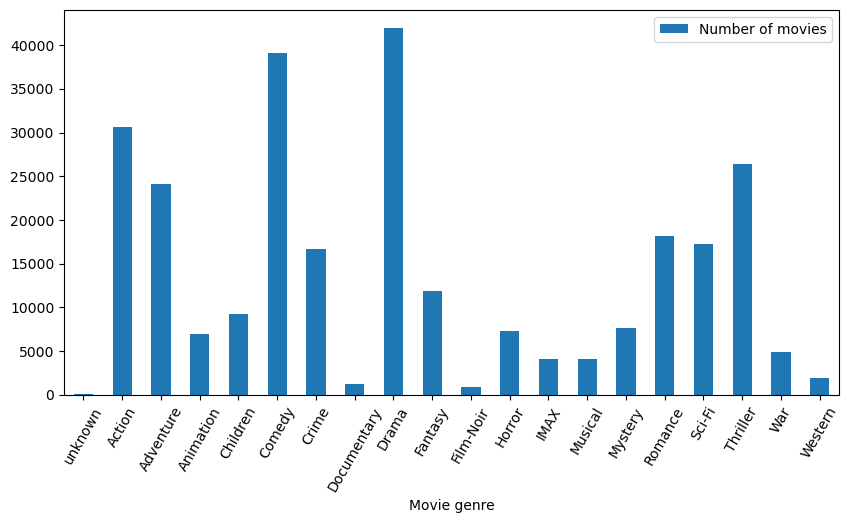

In [122]:
count = []
for i in movie_genre_list:
  # print(i)
  genre_based_movies = items_dataset[['movie id','movie title',i]]
  genre_based_movies = genre_based_movies[genre_based_movies[i] == 1]
  count.append(len(genre_based_movies))
  # merged_genre_movies = pd.merge(dataset, genre_based_movies, how='inner', on='movie id')
  # star_based_visualization(merged_genre_movies)
df = pd.DataFrame({'Movie genre':movie_genre_list, 'Number of movies':count})
ax = df.plot.bar(x='Movie genre', y='Number of movies', rot=60, figsize=(10, 5))

In [123]:
def star_based_visualization(dataframe):
  dataframe['rating'].value_counts(sort=False).plot(kind='bar' ,figsize=(10,6), use_index = True, rot=0)
  plt.title('Bar plot of rating frequency')
  plt.xlabel('Rating')
  plt.ylabel('Number of times a rating was given')
  # label = list(dataframe['rating'].value_counts(sort=False))
  plt.show()
  print("Total number of users watched this Genre: ",len(dataframe))
  print("  ")


In [124]:
def recommendations_genre(genre):
  x = genre
  print("****************************     ******************************     ******************************")
  print("****************************     ****** GENRE: ", x," ******     ******************************")
  print("    ")
  genre_based_movies = items_dataset[['movie id','movie title',x]]
  genre_based_movies = genre_based_movies[genre_based_movies[x] == 1]
  merged_genre_movies = pd.merge(dataset, genre_based_movies, how='inner', on='movie id')
  # merged_genre_movies.head()

  star_based_visualization(merged_genre_movies)
  high_rated_movies = merged_genre_movies.groupby(['movie title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
  high_rated_movies = high_rated_movies.to_frame()
  print("These are the top movies that can be naviely suggested to the new users for the requested movie genre:", x, ". Recommendations based on top average ratings.")
  print(high_rated_movies.head(10))
  print("****************************     ******************************     ******************************")
  popular_movies_ingenre = merged_genre_movies.groupby(['movie title']).agg({"rating":"count"})['rating'].sort_values(ascending=False)
  popular_movies_ingenre = popular_movies_ingenre.to_frame()
  popular_movies_ingenre.reset_index(level=0, inplace=True)
  popular_movies_ingenre.columns = ['movie title', 'Number of Users watched']
  print("These are the most popular movies which can be recommended to a new user in",x,"genre. Recommendations based on Popularity")
  print(popular_movies_ingenre.sort_values('Number of Users watched', ascending=False).head(10))
  print("****************************     ******************************     ******************************")
  highly_rated_popular_movies = pd.merge(high_rated_movies, popular_movies_ingenre, how = 'inner', on='movie title')
  # highly_rated_popular_movies.head(10)
  viewer_limit = 300
  ratings_limit = 4.0
  count = 0
  check = 0
  while viewer_limit > 0 and ratings_limit > 0:
    s = highly_rated_popular_movies[(highly_rated_popular_movies['Number of Users watched']>viewer_limit) & (highly_rated_popular_movies['rating']>=ratings_limit)]
    if len(s) < 11:
      if check == 0:
        viewer_limit -= 50
        check = 1
      else:
        ratings_limit -= 0.5
        check = 0
    else:
      break
  print("These movies are the best to suggest to a new user within their requested genre as they are popular and well rated by the users who already watched them.")
  print("These have rating more than ",ratings_limit," with atleast ",viewer_limit ," viewers.")

  print("**Recommendations based popularity and rating. These are top rated popular movies**")
  print(s)
  print("****************************     ******************************     ******************************")
  print("                             ")
  print("                             ")


****************************     ******************************     ******************************
****************************     ****** GENRE:  Action  ******     ******************************
    


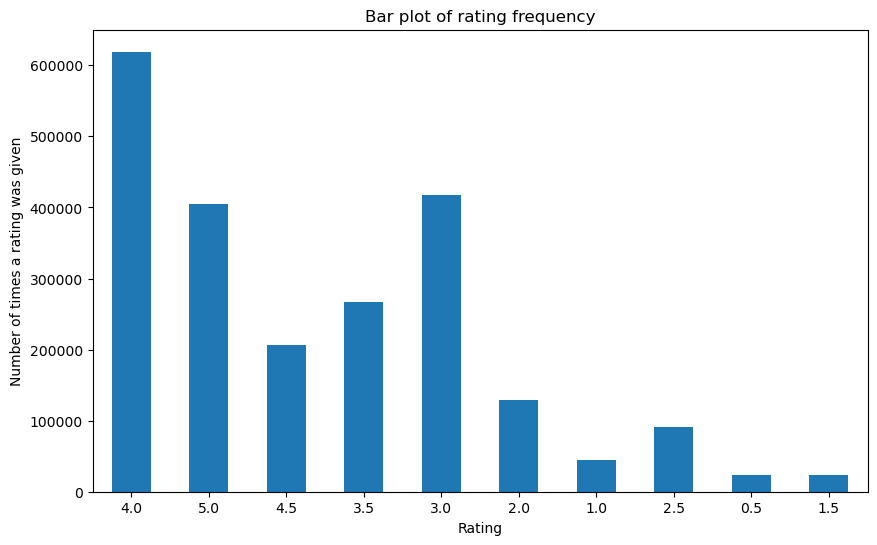

Total number of users watched this Genre:  2224453
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Action . Recommendations based on top average ratings.
                                                    rating
movie title                                               
Knock Off (1998)                                       5.0
On the Other Side of the Tracks (De l'autre côt...     5.0
Sonatine (Sonachine) (1993)                            5.0
Last Hurrah for Chivalry (Hao xia) (1979)              5.0
Shogun Assassin (1980)                                 5.0
Battle Royale 2: Requiem (Batoru rowaiaru II: C...     5.0
Wonder Woman (2009)                                    5.0
Priklyucheniya Kapitana Vrungelya (1979)               5.0
Tokyo Tribe (2014)                                     5.0
Love Exposure (Ai No Mukidashi) (2008)                 5.0
****************************     ******************************     ************

In [126]:
recommendations_genre('Action')

In [127]:

def hybrid_recommender_system():
    
    """
    This function implements the Hybrid Recommender System as per the requirements.
    
    """

    user_id = int(input("Please enter a user ID: "))
    if user_id in final['userId'].unique():
        n_similar_users = int(input("Please enter the number of similar users to retrieve: "))
        n_movies = int(input("Please enter the number of movies to recommend: "))

        recommended_movies = recommender_system(user_id, n_similar_users, n_movies)
        print(recommended_movies)
    elif user_id not in [i for i in final['userId']]:
        movie_name = input("User id not found Please enter a movie name: ")
        n_similar_movies = int(input("Please enter the number of similar movies to retrieve: "))
        if movie_name in movie_dict.keys():
            similar_movies = get_similar_movies(movie_dict[movie_name], n_similar_movies)
            print(similar_movies)
        else:
            familiar_name = input("Movie not found.please enter 'next' for similar movies or 'na': ")
            if familiar_name == "na":
                print(movie_genre_list)
                genre = input("Please select  a genre from above: ")
                recommended_movies = recommendations_genre(genre)
                print(recommended_movies)
            else:
                similar_movies=spell_correction()
                print(similar_movies)
    else:
        print("User ID not found. Please enter valid userid i.e, values 1 to 610 or input 'na'.")




In [128]:
hybrid_recommender_system()

Please enter a user ID: 4
Please enter the number of similar users to retrieve: 5
Please enter the number of movies to recommend: 10
Movie seen by the User:
['12 Angry Men (1957)',
 'Adventures of Priscilla, Queen of the Desert, The (1994)',
 'Afterglow (1997)',
 'Airplane! (1980)',
 'Aladdin (1992)',
 'All About My Mother (Todo sobre mi madre) (1999)',
 'Almost Famous (2000)',
 'Amadeus (1984)',
 'American Beauty (1999)',
 'Austin Powers: International Man of Mystery (1997)',
 'Austin Powers: The Spy Who Shagged Me (1999)',
 'Barcelona (1994)',
 'Beautiful Thing (1996)',
 'Beauty and the Beast (1991)',
 'Beetlejuice (1988)',
 'Before Night Falls (2000)',
 'Before Sunrise (1995)',
 'Being John Malkovich (1999)',
 'Best in Show (2000)',
 'Big Lebowski, The (1998)',
 'Billy Elliot (2000)',
 'Black Cat, White Cat (Crna macka, beli macor) (1998)',
 'Blow (2001)',
 'Blow-Up (Blowup) (1966)',
 'Blue Velvet (1986)',
 'Bonnie and Clyde (1967)',
 'Bowfinger (1999)',
 'Boys from Brazil, The (197